In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd
import scipy
scipy.__version__
import scipy.stats as stats

In [2]:
df_TOCC = pd.read_csv('../../datasets/TypeOfContractChannel.csv')
df_TOCC[:2]

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0


### X : 범주형 / Y : 연속형 : 범주형 상관관계 확인. Wilcoxon TEST

#### 선정 변수 : channel(항목 2), amount(비정규 분포)

- 분석 내용 : 서비스 방문과 홈쇼핑에 따른 월 렌탈 비용 평균이 차이가 있다.

    - 귀무가설 : 비용 평균에 차이 없다.
    - 대립가설 : 비용 평균에 차이 있다.
    

- 분석 결론 (기준 : p-value 0.05)

    - 통계 결론 : 대립가설이 참 (pvalue=0.0)
    - 사실 결론 : 비용 평균에 차이가 있다.

<Axes: xlabel='channel', ylabel='count'>

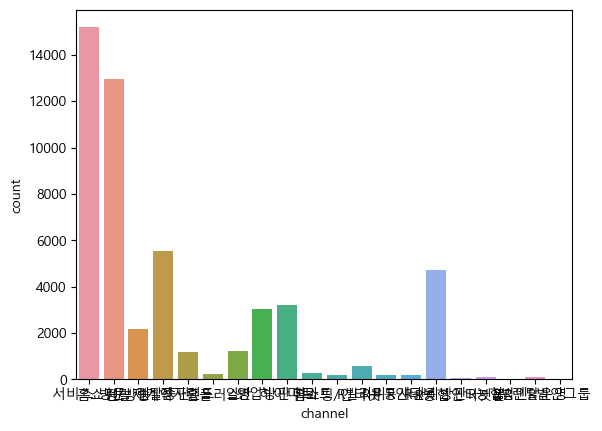

In [3]:
sns.countplot(data=df_TOCC, x='channel')

In [4]:
df_TOCC['channel'].value_counts()

서비스 방문     15186
홈쇼핑/방송     12977
렌탈총판        5544
R관리방판       4727
하이마트        3227
영업방판        3039
렌탈재계약       2193
일반          1232
전자랜드        1205
R빌리미         560
이마트          265
홈플러스         225
R인터넷         198
R유통사         188
홈쇼핑/인터넷      177
R렌탈운영        120
R농협          119
R농협인터넷몰       83
R법인그룹         20
R법인           19
Name: channel, dtype: int64

In [5]:
## 검증 대상 항목만 필터링 and 추출

condition = (df_TOCC['channel'] == '서비스 방문') | (df_TOCC['channel'] == '홈쇼핑/방송') 
df_channel_amount = df_TOCC[condition][['channel','amount']]
df_channel_amount.head(10) 

# null값 찾기

,channel,amount
0,서비스 방문,96900
1,서비스 방문,102900
2,홈쇼핑/방송,96900
5,서비스 방문,90900
6,홈쇼핑/방송,98400
7,홈쇼핑/방송,80400
8,서비스 방문,102900
9,서비스 방문,105900
10,홈쇼핑/방송,81900
11,홈쇼핑/방송,81900


In [6]:
df_channel_amount.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28163 entries, 0 to 51301
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   channel  28163 non-null  object
 1   amount   28163 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 660.1+ KB


##### 5천 건 이상 anderson tets : 정규 분포 검증

In [7]:
## s < cv : 정규분포 , s > cv : 비정규분포
statistic, cv ,sl = stats.anderson(df_channel_amount['amount'])
statistic, cv ,sl #1292 > 0.787

(1292.5765966678264,
 array([0.576, 0.656, 0.787, 0.918, 1.092]),
 array([15. , 10. ,  5. ,  2.5,  1. ]))

<Axes: xlabel='amount', ylabel='Count'>

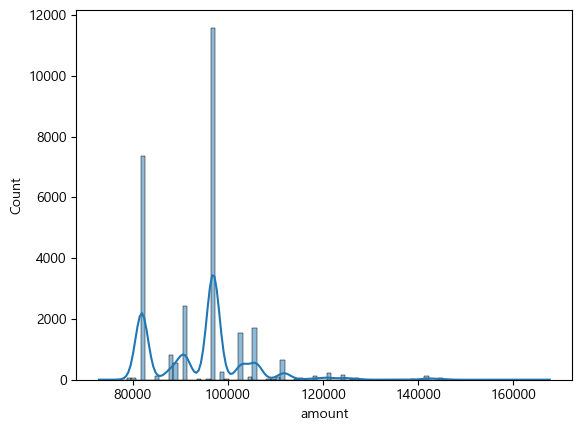

In [8]:
sns.histplot(df_channel_amount, x='amount', kde=True)

### 범주형 항목 따라 검증 : 2개 항목

In [9]:
df_channel_amount['channel'].value_counts()

서비스 방문    15186
홈쇼핑/방송    12977
Name: channel, dtype: int64

In [10]:
df_service = df_channel_amount[df_channel_amount['channel'] == '서비스 방문']
df_service.head()

,channel,amount
0,서비스 방문,96900
1,서비스 방문,102900
5,서비스 방문,90900
8,서비스 방문,102900
9,서비스 방문,105900


In [11]:
df_homeshopping = df_channel_amount[df_channel_amount['channel'] == '홈쇼핑/방송']
df_homeshopping.head()

,channel,amount
2,홈쇼핑/방송,96900
6,홈쇼핑/방송,98400
7,홈쇼핑/방송,80400
10,홈쇼핑/방송,81900
11,홈쇼핑/방송,81900


In [12]:
## 검증
stats.ranksums(df_service['amount'], df_homeshopping['amount'])

RanksumsResult(statistic=74.731078009603, pvalue=0.0)

### X : 범주형 / Y : 연속형 비정규분포
    - 상관관계 확인. Kruskal Test

#### 선정 변수 : channel(항목 3), amount(비정규 분포)
- amount 검증: AndersonResult_statistic, cv, sl

- 분석 내용 : 채널에 따른 amount의 변화가 잇는가?
        ['서비스 방문', '홈쇼핑/방송', '렌탈총판', 'R관리방판']
    - 귀무가설 : 4개 채널에 따른 amount 분포 변화 없음
    - 대립가설 : 4개 채널에 따른 amount 분포 변화 있음
    

- 분석 결론 (기준 : p-value 0.05)

    - 통계 결론 : pvalue=0.0_대립가설 참
    - 사실 결론 : 4개 채널에 따른 amount 분포 변화가 존재함. 

<Axes: xlabel='amount', ylabel='Count'>

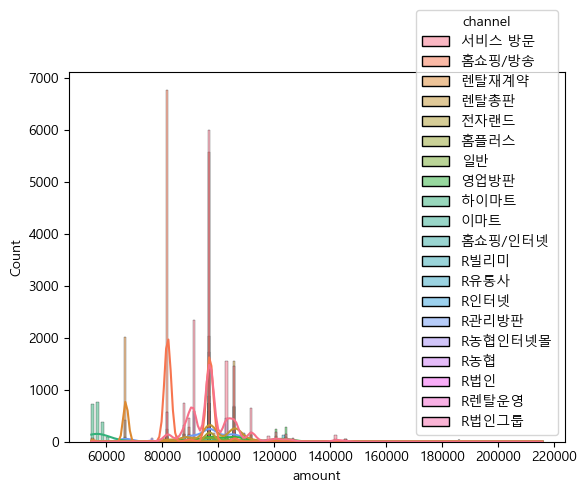

In [13]:
sns.histplot(data=df_TOCC, x='amount', kde=True, hue='channel')

In [15]:
## '서비스 방문', '홈쇼핑/방송', '렌탈총판', 'R관리방판'
df_TOCC['channel'].value_counts()[:5]

서비스 방문    15186
홈쇼핑/방송    12977
렌탈총판       5544
R관리방판      4727
하이마트       3227
Name: channel, dtype: int64

In [66]:
### x가 정규인지 비정규인지 확인해야함. 고로 df 다시 만들어야함
conditions = (df_TOCC['channel'] == '서비스 방문')|(df_TOCC['channel'] == '홈쇼핑/방송')|(df_TOCC['channel'] == '렌탈총판')|(df_TOCC['channel'] == 'R관리방판')
df_channel4_amount = df_TOCC[conditions][['channel', 'amount']] # 필터 추출 동시
df_channel4_amount

,channel,amount
0,서비스 방문,96900
1,서비스 방문,102900
2,홈쇼핑/방송,96900
5,서비스 방문,90900
6,홈쇼핑/방송,98400
...,...,...
51297,홈쇼핑/방송,96900
51298,R관리방판,56979
51299,R관리방판,96900
51301,홈쇼핑/방송,120900


In [67]:
df_channel4_amount.isnull().sum()

channel    0
amount     0
dtype: int64

In [68]:
df_channel4_amount[:2]

,channel,amount
0,서비스 방문,96900
1,서비스 방문,102900


In [69]:
df_channel4_amount['channel'].value_counts()

서비스 방문    15186
홈쇼핑/방송    12977
렌탈총판       5544
R관리방판      4727
Name: channel, dtype: int64

<Axes: xlabel='amount', ylabel='Count'>

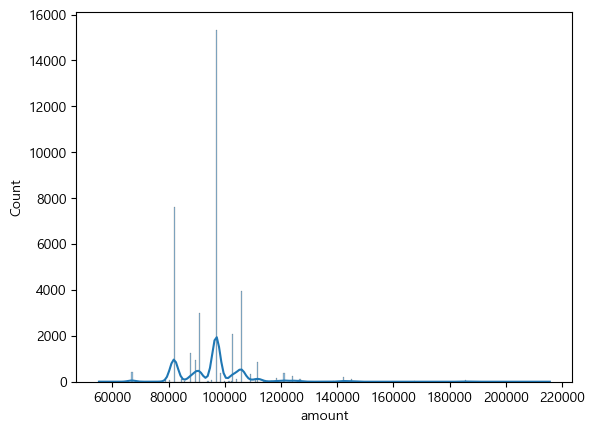

In [70]:
### 그래프확인
sns.histplot(data=df_channel4_amount, x='amount', kde=True)

### statistic, cv, sl
stats.anderson(df_channel4_amount['amount'])
- statistic, cv, sl =(1307.6338010715626,array([0.576, 0.656, 0.787, 0.918, 1.092]),array([15. , 10. ,  5. ,  2.5,  1. ]))
     - 주로 가운데 봐야함. 5. 이것과 동일한 위치의 cv 값을 본다. 0.787 / 이 두개를 기준으로 statistic과 비교하면 
##  sl의 가운데와 맞는 cv를 기준으로 s < cv : 정규분포 , s > cv : 비정규분포
 

In [71]:
### 5000 이상, anderson은 변수로 지정해서 봐야함.
statistic, cv, sl = stats.anderson(df_channel4_amount['amount'])
statistic, cv, sl

(1476.100903137849,
 array([0.576, 0.656, 0.787, 0.918, 1.092]),
 array([15. , 10. ,  5. ,  2.5,  1. ]))

In [72]:
condition = (df_channel4_amount['channel'] == '서비스 방문')
df_result = df_channel4_amount[condition]

##### 범주형 항목이 3개 이상일 때 검증

In [85]:
#type(df_channel4_amount['channel'].value_counts())
df_channel_list = df_channel4_amount['channel'].value_counts().index.to_list()
df_channel_list

['서비스 방문', '홈쇼핑/방송', '렌탈총판', 'R관리방판']

In [89]:
# 이걸 for looping 돌릴 수 있다. 
df_result = [] # list()
for item in df_channel_list : 
    condition = (df_channel4_amount['channel'] == item)
    df_result.append(df_channel4_amount[condition]) ## list_index에 value가 쌓일때 DataFrame 형식으로 쌓이는거 같음
    ### 검증이 일어나는 변수는 4개. 각각 변수를 담는다. 
len(df_result)
## 원래는 df_result.append(df_channel4_amount[condition]) 이렇게 담는게 아니고 amount에 해당하는 것만 series로 담는다. 
## ⇒ df_result.append(df_channel4_amount[condition]['amount'])

4

In [87]:
type(df_result)

list

In [90]:
## df_result[3][:2] 3은 list의 3, :2는 row 2개
df_result[3][:2]

,channel,amount
1339,R관리방판,66900
3655,R관리방판,66900


In [92]:
### 검증 변수 4개 _ dataframe으로 들어가긴 너무 커. list의 amount만 넣어야함. 
stats.kruskal(df_result[0]['amount'],df_result[1]['amount'],df_result[2]['amount'],df_result[3]['amount'],)

KruskalResult(statistic=8271.821667245342, pvalue=0.0)